<a href="https://colab.research.google.com/github/Mahsabeigi33/marijuana/blob/main/medical_marijuana_cbd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('/content/sample_data/CanabisBenefits.csv')

In [3]:
df.head()

,health condition,alternate name,health condition.1,evidence score 0 = harmful \n1 = no / insufficient evidence\n6 = strong,popular interest,Number of citations on Google Scholar (2000-2017) search format: condition+cannabis,CBD,simple English notes,notes,link,other International review board or metastudy,individual study,main study source name,other sources
0,ADD/ADHD,NaN,mental health,1,458000,824,CBD,Animal studies show improved social behaviour ...,Pretreatment with the phytocannabinoid cannabi...,http://journals.sagepub.com/doi/abs/10.1177/02...,NaN,NaN,Journal of Psychopharmacology,NaN
1,Adolescence,NaN,neurological,0,982000,103000,NaN,Use during teenage years appears to affect imp...,"In one large population study, cannabis use, b...",https://www.frontiersin.org/articles/10.3389/f...,https://ajp.psychiatryonline.org/doi/10.1176/a...,https://www.ncbi.nlm.nih.gov/pubmed/30408351,"American Journal of Psychiatry, Frontiers in P...",NaN
2,AIDS-related weight loss,NaN,immune system,4,460000,29500,NaN,One small study (participants = 139) of AIDS p...,Cochrane claims: 'evidence for the efficacy an...,http://onlinelibrary.wiley.com/doi/10.1002/146...,http://www.sciencedirect.com/science/article/p...,NaN,"Cochrane, Journal of Ethnopharmacology, NAP",NaN
3,ALS,"Amyotrophic Lateral Sclerosis, Lou Gehrig's Di...",neurological,2,505000,1420,NaN,One very small study (13 patients) resulting i...,Although the small number of people [13] with ...,http://journals.sagepub.com/doi/abs/10.1177/10...,NaN,NaN,American Journal of Hospice and Palliative Med...,NaN
4,Alzheimer’s,NaN,neurological,1,524000,19200,CBD,No human studies yet.,No human studies yet. A review of in-vitro and...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN,NaN,Frontiers in Pharmacology,NaN


**The dataset consists of several columns, including:**

* health condition: The medical condition under consideration.
* alternate name: Alternate names for the medical condition, if any.
* health condition.1: A general category for the health condition.
* evidence score 0 = harmful \n1 = no / insufficient evidence\n6 = strong: A score representing the strength of the evidence for the efficacy of cannabis or CBD in treating the condition. A score of 0 indicates that cannabis or CBD is harmful, 1 indicates no or insufficient evidence, and 6 indicates strong evidence.
* popular interest: A measure of the popular interest in the condition and its treatment with cannabis or CBD.
* Number of citations on Google Scholar (2000-2017) search format: condition+cannabis: The number of citations on Google Scholar for articles related to the condition and cannabis.
* CBD: A column indicating whether CBD is involved in the treatment.
* simple English notes: A summary of the evidence in simple English.
* notes: Detailed notes on the evidence.
* link: A link to the source of the evidence.
* other International review board or metastudy: A link to another international review board or metastudy, if any.
* individual study: A link to an individual study, if any.
* main study source name: The name of the main study source.
* other sources: Other sources, if any.

In [4]:
df=df.rename(columns={df.columns[3]:'evidence_score'})
# Check the unique values in the evidence_score column
unique_values = df['evidence_score'].unique()
unique_values

array([1, 0, 4, 2, 3, 5])

In [6]:
df.isna().sum()

health condition                                                                        0
alternate name                                                                         64
health condition.1                                                                      0
evidence_score                                                                          0
popular interest                                                                        0
Number of citations on Google Scholar (2000-2017) search format: condition+cannabis     0
CBD                                                                                    49
simple English notes                                                                    0
notes                                                                                   0
link                                                                                    1
other International review board or metastudy                                          57
individual

In [8]:
df.shape

(69, 14)

In [14]:
del(df['alternate name'])

In [17]:
data=df.copy()

In [35]:
df.drop(['other International review board or metastudy','individual study','other sources','CBD'],inplace=True,axis=1)

In [36]:
df.shape

(69, 9)

In [37]:
df.isna().sum()

health condition                                                                       0
health condition.1                                                                     0
evidence_score                                                                         0
popular interest                                                                       0
Number of citations on Google Scholar (2000-2017) search format: condition+cannabis    0
simple English notes                                                                   0
notes                                                                                  0
link                                                                                   1
main study source name                                                                 0
dtype: int64

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
evidence_score,69.0,1.478261,1.106248,0.0,1.0,1.0,2.0,5.0
popular interest,69.0,456237.536232,580987.023963,3490.0,193000.0,412000.0,524000.0,4830000.0
Number of citations on Google Scholar (2000-2017) search format: condition+cannabis,69.0,18052.768116,18700.148696,11.0,6950.0,14500.0,21300.0,103000.0


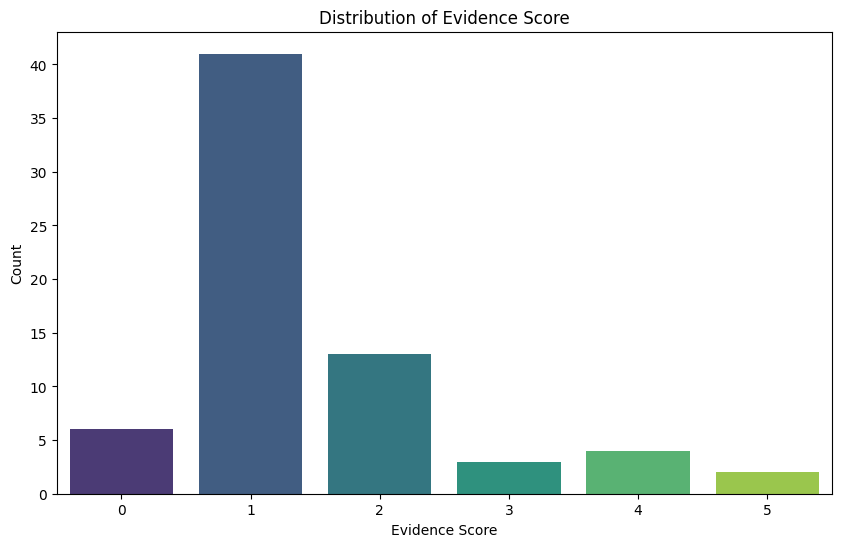

In [40]:
# Create a count plot of the evidence score
plt.figure(figsize=(10, 6))
sns.countplot(x='evidence_score', data=df, palette='viridis')
plt.title('Distribution of Evidence Score')
plt.xlabel('Evidence Score')
plt.ylabel('Count')
plt.show()


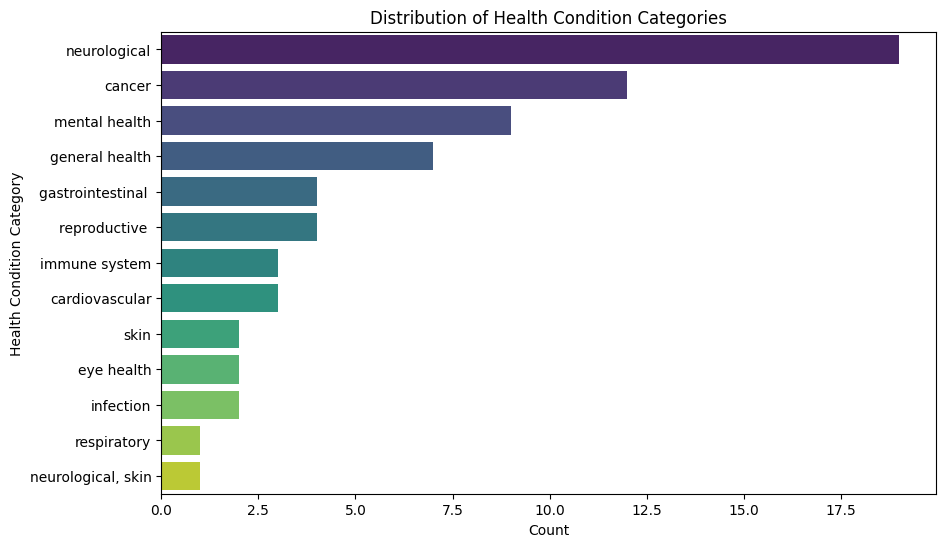

In [41]:
# Create a count plot of the health condition categories
plt.figure(figsize=(10, 6))
sns.countplot(y='health condition.1', data=df, palette='viridis', order=df['health condition.1'].value_counts().index)
plt.title('Distribution of Health Condition Categories')
plt.xlabel('Count')
plt.ylabel('Health Condition Category')
plt.show()


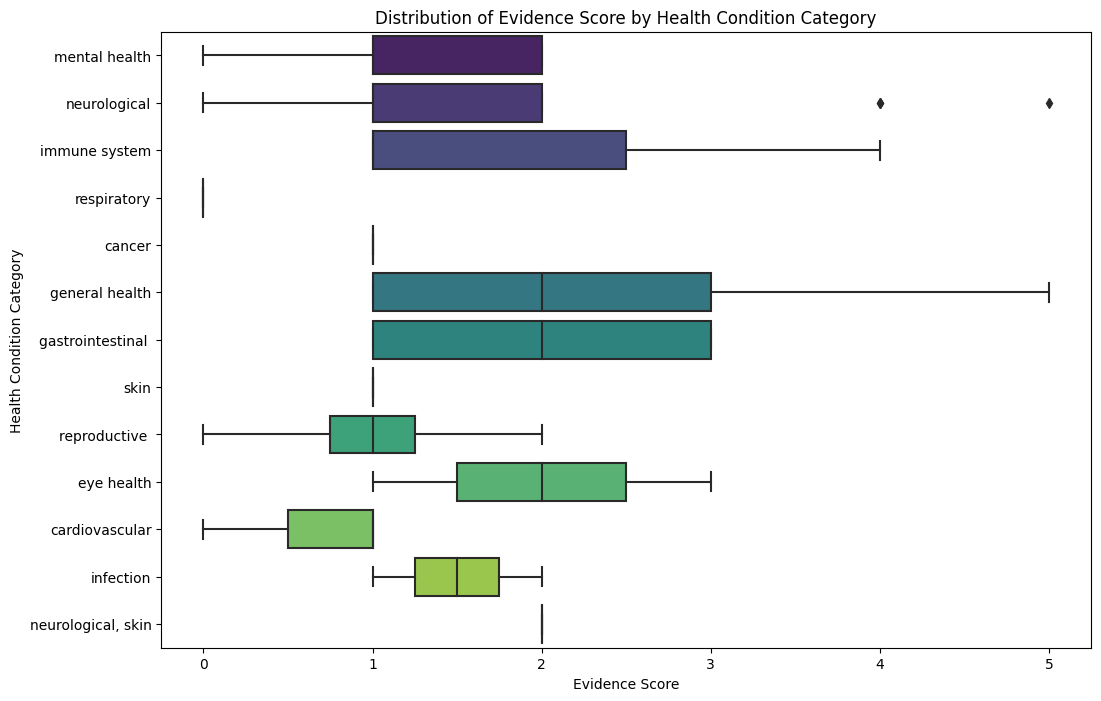

In [42]:
# Create a box plot of the evidence score by health condition category
plt.figure(figsize=(12, 8))
sns.boxplot(x='evidence_score', y='health condition.1', data=df, palette='viridis')
plt.title('Distribution of Evidence Score by Health Condition Category')
plt.xlabel('Evidence Score')
plt.ylabel('Health Condition Category')
plt.show()


<ipython-input-43-b3c31b52b6d9>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='popular interest', y='evidence_score', data=df, palette='viridis')


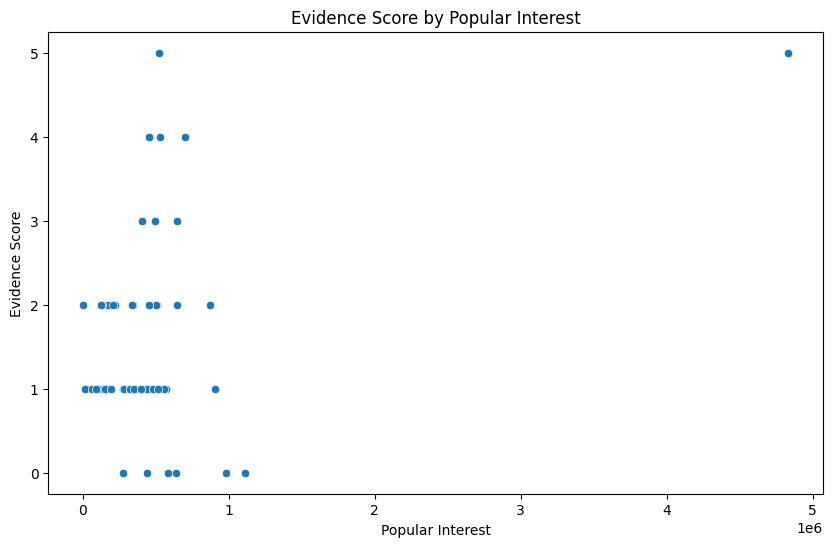

In [43]:
# Create a scatter plot of the evidence score by popular interest
plt.figure(figsize=(10, 6))
sns.scatterplot(x='popular interest', y='evidence_score', data=df, palette='viridis')
plt.title('Evidence Score by Popular Interest')
plt.xlabel('Popular Interest')
plt.ylabel('Evidence Score')
plt.show()


In [45]:
# Filter the dataframe for conditions with strong evidence (evidence_score >= 5)
strong_evidence_df = df[df['evidence_score'] >= 5]

# Display the conditions with strong evidence
strong_evidence_df[['health condition', 'health condition.1', 'evidence_score', 'simple English notes']]


,health condition,health condition.1,evidence_score,simple English notes
41,Insomnia,general health,5,Large studies have shown that cannabis compoun...
50,Multiple Sclerosis (MS),neurological,5,2 studies involving a total of 790 subjects sh...


In [46]:
# Filter the dataframe for conditions with no or insufficient evidence (evidence_score = 1)
no_evidence_df = df[df['evidence_score'] == 1]

# Display the first few conditions with no or insufficient evidence
no_evidence_df[['health condition', 'health condition.1', 'evidence_score', 'simple English notes']].head()


,health condition,health condition.1,evidence_score,simple English notes
0,ADD/ADHD,mental health,1,Animal studies show improved social behaviour ...
4,Alzheimer’s,neurological,1,No human studies yet.
8,Autism,neurological,1,Might have some positive impact on autism-type...
9,Autoimmune Disease,immune system,1,"Potential treatment for autoimmune diseases, s..."
10,Bipolar Disorder,mental health,1,Possibly might help. But no conclusive studies...


In [47]:
# Filter the dataframe for conditions for which cannabis or CBD is harmful (evidence_score = 0)
harmful_df = df[df['evidence_score'] == 0]

# Display the conditions for which cannabis or CBD is harmful
harmful_df[['health condition', 'health condition.1', 'evidence_score', 'simple English notes']]


,health condition,health condition.1,evidence_score,simple English notes
1,Adolescence,neurological,0,Use during teenage years appears to affect imp...
7,Asthma,respiratory,0,Smoking cannabis immediately expands the airwa...
20,Depression,mental health,0,No evidence it relieves depression. Heavy use ...
27,Fertility,reproductive,0,Reduces fertility in both men and women. That ...
60,Schizophrenia,mental health,0,Does not seem to reduce psychotic symptoms. In...
63,Stroke,cardiovascular,0,Numerous case reports & population studies sho...


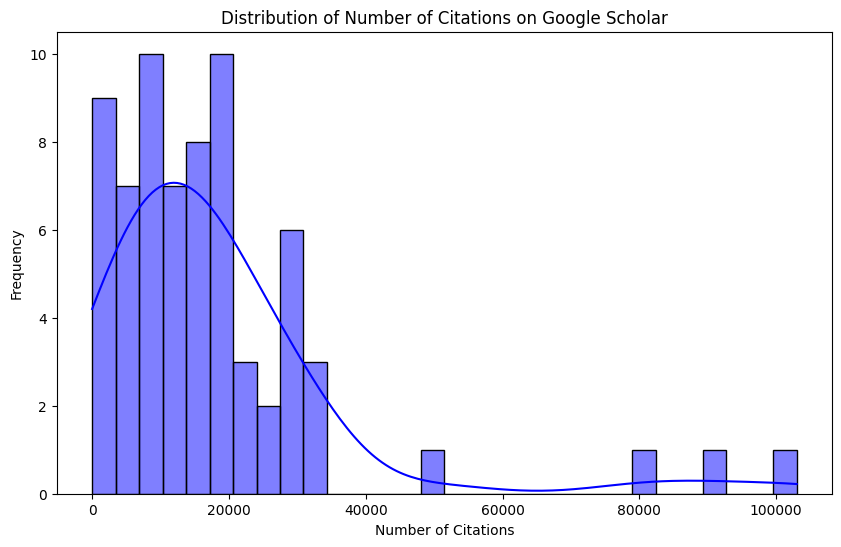

In [48]:
# Create a histogram of the number of citations on Google Scholar
plt.figure(figsize=(10, 6))
sns.histplot(df['Number of citations on Google Scholar (2000-2017) search format: condition+cannabis'], kde=True, bins=30, color='b')
plt.title('Distribution of Number of Citations on Google Scholar')
plt.xlabel('Number of Citations')
plt.ylabel('Frequency')
plt.show()
